<a href="https://colab.research.google.com/github/Rogerio-mack/work/blob/main/rogerio_Aula_2_SWAP_CNOT_and_bell_states.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Qiskit Tutorial: SWAP and CNOT gate.

In [1]:
try:
  import qiskit; print(qiskit.__version__)
except ImportError:
  print('Install Qiskit')
  !pip install -q qiskit
  !pip install -q qiskit[visualization]

Install Qiskit
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 81.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
try:
  from qiskit_aer import QasmSimulator
  print('Qiskit Aer imported');
except ImportError:
  print('Install Qiskit-Aer')
  !pip install --quiet qiskit-aer
  from qiskit_aer import QasmSimulator


Install Qiskit-Aer
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 87.0 MB/s eta 0:00:00


In [4]:
import numpy as np
from numpy import pi, sqrt, sin, cos
from numpy import random
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('dark_background') #background

#QISKIT
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit, transpile # , assemble
from qiskit.visualization import plot_bloch_multivector, plot_histogram, circuit_drawer
from qiskit_aer import QasmSimulator

from qiskit_aer import AerSimulator

## Swap

Fazendo os importes

Circuito antes do SWAP:


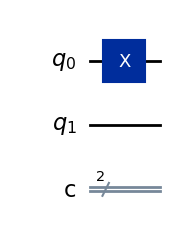

In [6]:
# Create a 2-qubit circuit with 2 classical bits for measurement
qc = QuantumCircuit(2, 2)

# Prepare state |10> (qubit 0 = 1, qubit 1 = 0)
qc.x(0)

# Draw before swap
print("Circuito antes do SWAP:")
# print(qc)

display(qc.draw('mpl'))

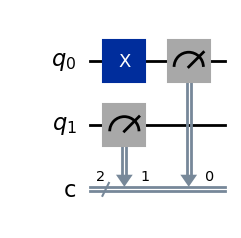

In [7]:
# Measure both qubits into classical bits
qc.measure(qubit=[0,1],cbit=[0,1])

# print(qc)
display(qc.draw('mpl'))


Counts after swap: {'01': 100}


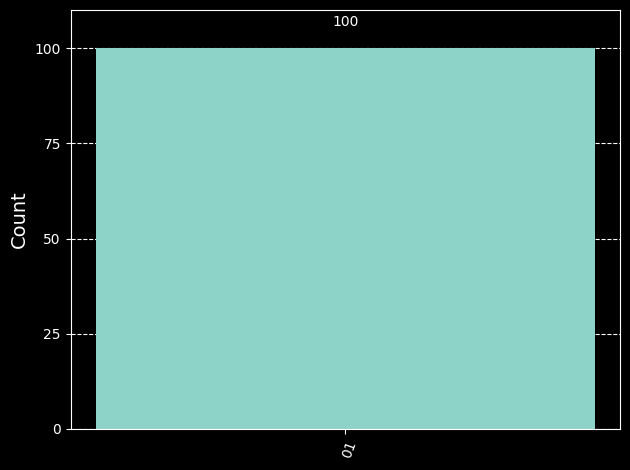

In [8]:
# Simulate
# Inicializando a classe
sim = AerSimulator()

# Aplicando o circuito para rodar no simulador
compiled = transpile(qc, sim)

# Executando o simulador 100 vezes
result = sim.run(compiled, shots=100).result()

counts = result.get_counts()
print('\nCounts after swap:', counts)

plot_histogram(counts)

### Aplicando a porta swap

Circuito Depois  do SWAP:


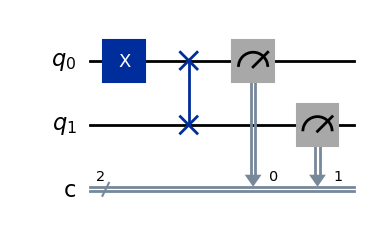

In [9]:
# Create a 2-qubit circuit with 2 classical bits for measurement
qc = QuantumCircuit(2, 2)

# Prepare state |10> (qubit 0 = 1, qubit 1 = 0)
qc.x(0)

# Apply SWAP between qubit 0 and 1
qc.swap(0, 1)

# Draw before swap
print("Circuito Depois  do SWAP:")

# Measure both qubits into classical bits
qc.measure(qubit=[0,1],cbit=[0,1])

# print(qc)
display(qc.draw('mpl'))


Counts after swap: {'10': 1000}


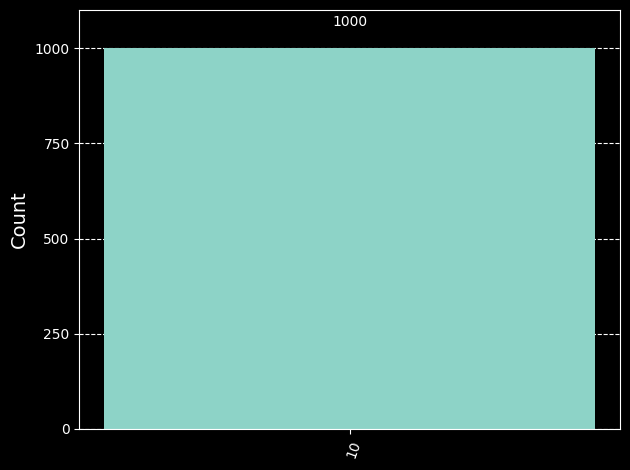

In [10]:
# Simulate
# Inicializando a classe
sim = AerSimulator()

# Aplicando o circuito para rodar no simulador
compiled = transpile(qc, sim)

# Executando o simulador 1000 vezes
result = sim.run(compiled, shots=1000).result()

counts = result.get_counts()
print('\nCounts after swap:', counts)

plot_histogram(counts)

## CNOT

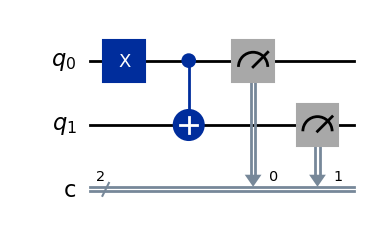

In [11]:
# Circuito com 2 qubits e 2 bits clássicos
qc = QuantumCircuit(2, 2)

# Prepara |10> → controle=1, alvo=0
qc.x(0)          # qubit 0 = 1
qc.cx(0, 1)      # CNOT(control=0, target=1)
qc.measure([0,1], [0,1])

display(qc.draw('mpl'))

In [12]:
# Simulate
# Inicializando a classe
sim = AerSimulator()

# Aplicando o circuito para rodar no simulador
compiled = transpile(qc, sim)

# Executando o simulador 100 vezes
result = sim.run(compiled, shots=100).result()

counts = result.get_counts()
print('\nCounts after swap:', counts)



Counts after swap: {'11': 100}


## Estados de Bell

![image](https://www.researchgate.net/publication/341640818/figure/fig10/AS:962156786876419@1606407462217/Quantum-circuits-for-Bell-states-preparation-by-using-quantum-gates-It-transforms-a.png)

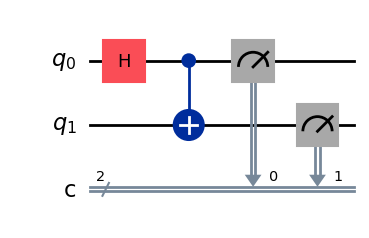

In [17]:
# Circuito com 2 qubits e 2 bits clássicos
qc = QuantumCircuit(2, 2)

# Prepara |10> → controle=1, alvo=0
qc.h(0)          # qubit 0 = 1
qc.cx(0, 1)      # CNOT(control=0, target=1)
qc.measure([0,1], [0,1])

display(qc.draw('mpl'))
# print(qc)

In [25]:
def simula():
  sim = AerSimulator()

  # Aplicando o circuito para rodar no simulador
  compiled = transpile(qc, sim)

  # Executando o simulador 100 vezes
  result = sim.run(compiled, shots=1000).result()

  counts = result.get_counts()
  print('\nCounts after swap:', counts)

simula()


Counts after swap: {'01': 520, '10': 480}


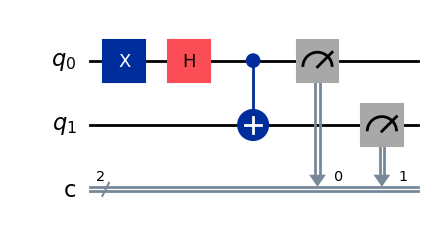


Counts after swap: {'11': 538, '00': 462}


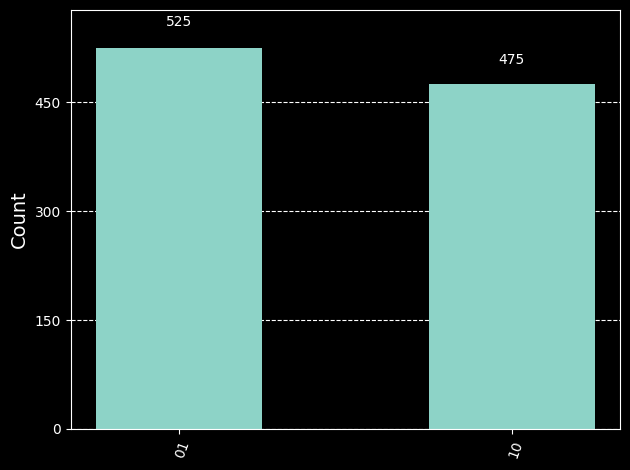

In [28]:
qc = QuantumCircuit(2, 2)

qc.x(0)
qc.h(0)
qc.cx(0, 1)
qc.measure([0,1], [0,1])

display(qc.draw('mpl'))
simula()
plot_histogram(counts)

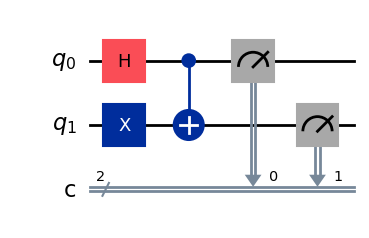


Counts after swap: {'10': 537, '01': 463}


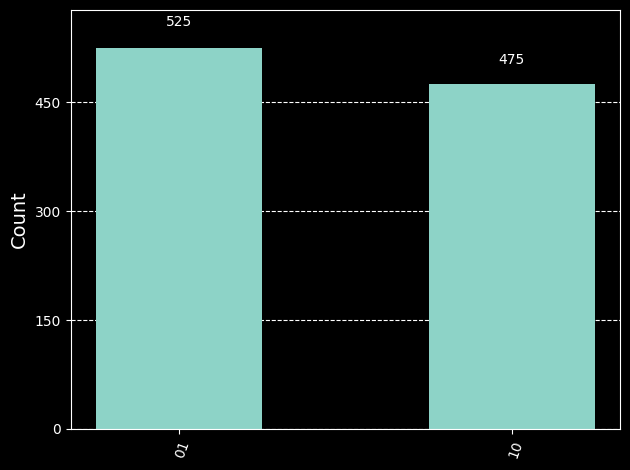

In [29]:
qc = QuantumCircuit(2, 2)

qc.h(0)
qc.x(1)
qc.cx(0, 1)
qc.measure([0,1], [0,1])

display(qc.draw('mpl'))
simula()
plot_histogram(counts)

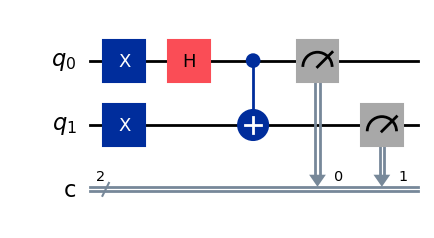


Counts after swap: {'01': 481, '10': 519}


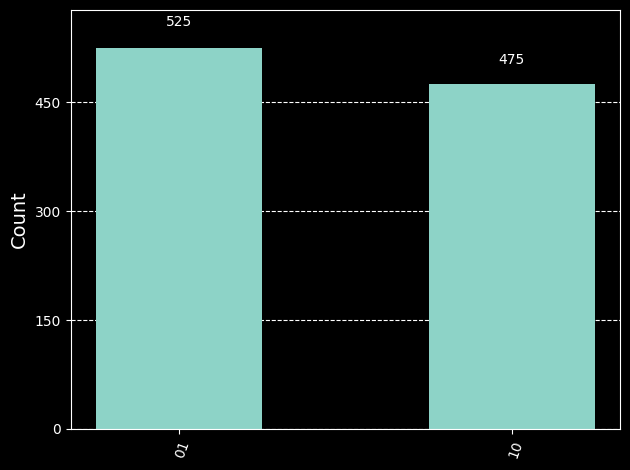

In [30]:
qc = QuantumCircuit(2, 2)

qc.x(0)
qc.h(0)
qc.x(1)
qc.cx(0, 1)
qc.measure([0,1], [0,1])

display(qc.draw('mpl'))
simula()
plot_histogram(counts)

No preparamos o estado de bell $|\Phi^+\rangle = (|00\rangle + |11\rangle)/\sqrt{2}$.

Agora voces devem preparar o outros trêis estado : $|\Phi^-\rangle$, $|\Psi^+\rangle$, and $|\Psi^-\rangle$.

## Teletransporte

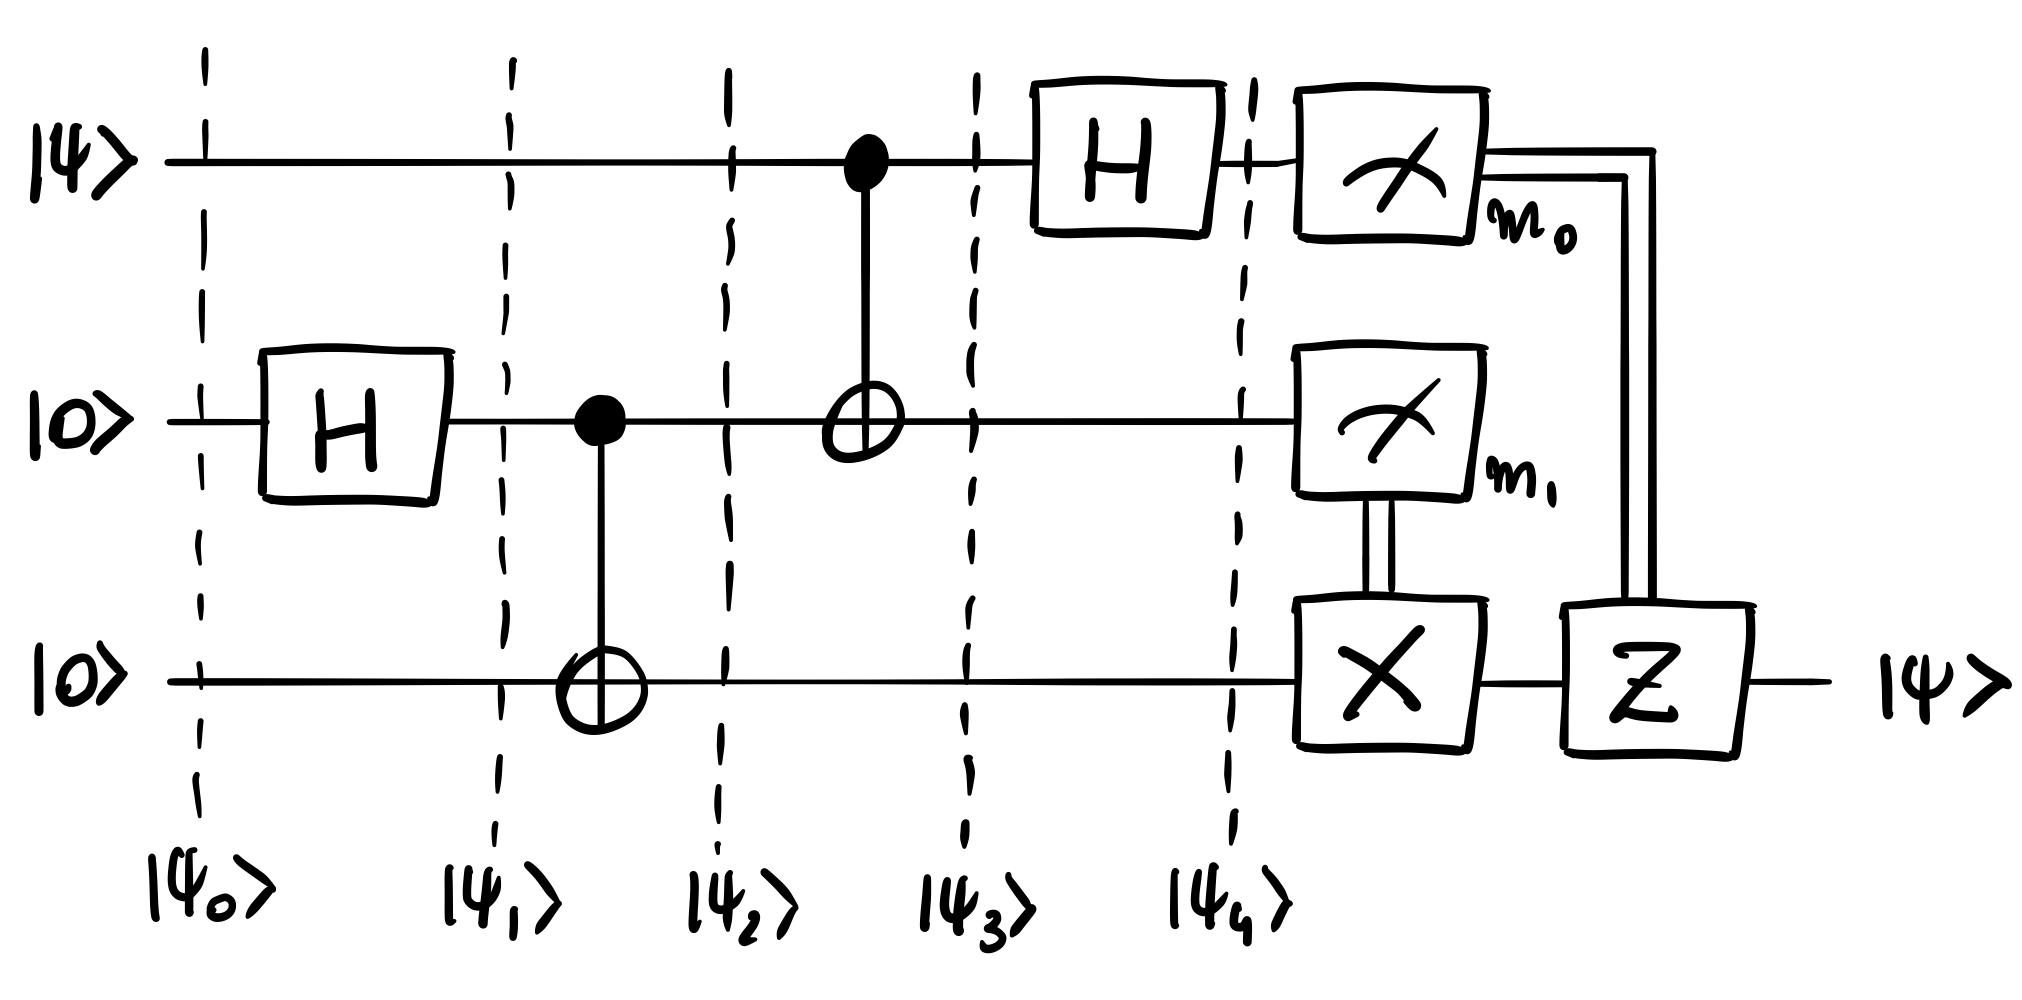


Agora é a sua vez! Implemente o circuito de teletransporte quântico utilizando o Qiskit. Lembre-se dos passos necessários:

1.  Criar um estado a ser teletransportado.
2.  Criar um par emaranhado de Bell.
3.  Aplicar as portas quânticas necessárias para o teletransporte.
4.  Realizar as medições e aplicar as correções no qubit receptor.
5.  Simular o circuito e verificar o resultado.